In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as acs
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from random import randint
from sklearn.tree import DecisionTreeClassifier as dt
np.set_printoptions(suppress=True)
from sklearn.ensemble import AdaBoostClassifier
import time

In [43]:
# Load libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score as acs
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [62]:
data = pd.read_csv('Proj1ReorderedRound.csv')
X = data.drop(['Condition'], axis = 1)
Y = data['Condition']

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

YClass = ['Condition3','Condtion4','Normal1']    #default target names. only useful in visualisation

In [3]:
k = 4

cv = sk(n_splits=k, shuffle=True, random_state=0)



Fold Group  1


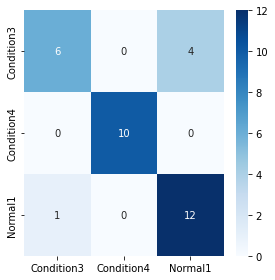

              precision    recall  f1-score   support

  Condition3       0.86      0.60      0.71        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.75      0.92      0.83        13

    accuracy                           0.85        33
   macro avg       0.87      0.84      0.84        33
weighted avg       0.86      0.85      0.84        33



Fold Group  2


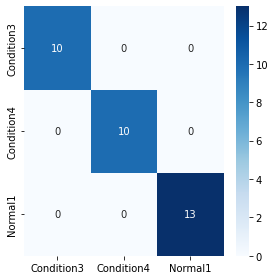

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Fold Group  3


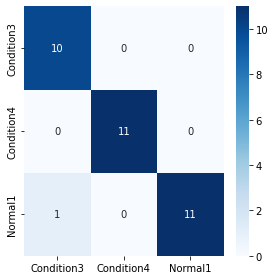

              precision    recall  f1-score   support

  Condition3       0.91      1.00      0.95        10
  Condition4       1.00      1.00      1.00        11
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  4


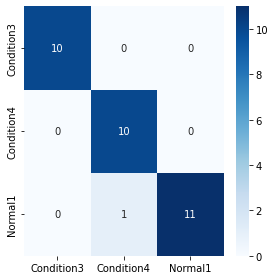

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       0.91      1.00      0.95        10
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32


RF

average C3 Precision =  0.9416
average C4 Precision =  0.9773
average N1 Precision =  0.9375
average Accuracy =  0.9467


In [4]:
#default RF
model = RFC(random_state = 0)
n = 1

C3PL = []
C4PL = []
N1PL = []

AL = []

for trainIndex, testIndex in cv.split(X, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3PL.append(C3Pre)
    C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4PL.append(C4Pre)
    N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1PL.append(N1Pre)
    
    Acc = acs(test_Y,pred_Y)
    AL.append(Acc)
    
print('\nRF\n')

print('average C3 Precision = ', np.mean(C3PL).round(4))
print('average C4 Precision = ' , np.mean(C4PL).round(4))
print('average N1 Precision = ', np.mean(N1PL).round(4))
print('average Accuracy = ', np.mean(AL).round(4))

In [5]:
#prepare for optimization
nbase = 50

nRange = []
stage =  1

for i in range(-10,11):
    x = np.round(nbase + i*(10**(1-stage)),stage)
    nRange.append(x)
    
nRange[0] = np.floor(nRange[0] + 10**(-stage))

nRange

[40.0,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

In [6]:
nbase = 100
nbaseDF = pd.DataFrame(columns = ['n'])
index = 0

for stage in range(2):
    
    Range = []
    for i in range(-10,11):
        if (i != -10):
            x = np.round(nbase + i*(10**(1-stage)),stage)
            Range.append(x)
    
    param_grid = {'n_estimators': Range}
    grid = GridSearchCV(RFC(random_state = 0), param_grid, cv = cv, verbose = 1)
    grid.fit(X,Y.values.ravel())
    
    nbase = grid.best_params_['n_estimators']
    
    nbaseDF.loc[index] = nbase
    index += 1
    
nbest = nbaseDF.iloc[-1].values[0]
nbaseDF

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Fitting 4 folds for each of 20 candidates, totalling 80 fits


,n
0,80
1,74


In [7]:
nbest #print best n_estimator value

74



Fold Group  1


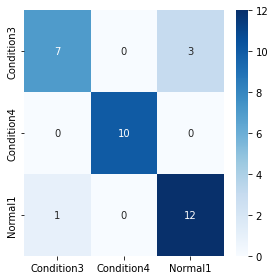

              precision    recall  f1-score   support

  Condition3       0.88      0.70      0.78        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.88        33
   macro avg       0.89      0.87      0.88        33
weighted avg       0.88      0.88      0.88        33



Fold Group  2


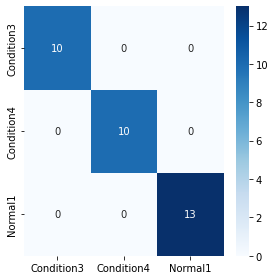

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Fold Group  3


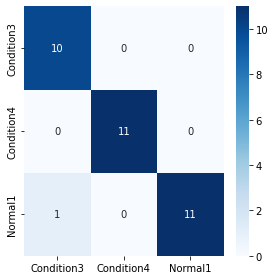

              precision    recall  f1-score   support

  Condition3       0.91      1.00      0.95        10
  Condition4       1.00      1.00      1.00        11
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  4


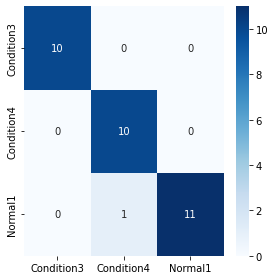

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       0.91      1.00      0.95        10
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32


RF

n_estimators =  74
average C3 Precision =  0.946
average C4 Precision =  0.9773
average N1 Precision =  0.95
average Accuracy =  0.9543


In [8]:
#optmisation with only n_estimator
model = RFC(random_state = 0, n_estimators = nbest)
n = 1

C3PL = []
C4PL = []
N1PL = []

AL = []

for trainIndex, testIndex in cv.split(X, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3PL.append(C3Pre)
    C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4PL.append(C4Pre)
    N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1PL.append(N1Pre)
    
    Acc = acs(test_Y,pred_Y)
    AL.append(Acc)
    
print('\nRF\n')
print('n_estimators = ', nbest)

print('average C3 Precision = ', np.mean(C3PL).round(4))
print('average C4 Precision = ' , np.mean(C4PL).round(4))
print('average N1 Precision = ', np.mean(N1PL).round(4))
print('average Accuracy = ', np.mean(AL).round(4))

In [9]:
#prepare for more optimization
sbase = 0.99

Range = []
stage =  1

for i in range(-10,11):
    x = np.round(sbase + i*(10**(-1-stage)),stage+1)
    
    if (x <= 1):
        Range.append(x)
    
        
Range[0] = Range[0] + 10**(-2-stage)
Range[-1] = Range[-1] - 10**(-2-stage)

Range

[0.891, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999]

In [10]:
#perform gridsearch to get optimal max_samples
sbase = 1
sbaseDF = pd.DataFrame(columns = ['size'])
index = 0

for stage in range(2):
    
    Range = []
    for i in range(-10,11):
        x = np.round(sbase + i*(10**(-1-stage)),stage+1)
        
        if (x < 1):
            Range.append(x)
            
    Range[0] = Range[0] + 10**(-2-stage)
    
    param_grid = {'max_samples': Range}
    grid = GridSearchCV(RFC(random_state = 0), param_grid, cv = cv, verbose = 1)
    grid.fit(X,Y.values.ravel())
    
    sbase = grid.best_params_['max_samples']
    
    sbaseDF.loc[index] = sbase
    index += 1
    
sbest = sbaseDF.iloc[-1].values[0]
sbaseDF

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Fitting 4 folds for each of 21 candidates, totalling 84 fits


,size
0,0.50
1,0.51




Fold Group  1


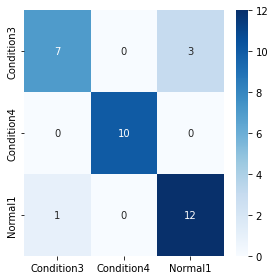

              precision    recall  f1-score   support

  Condition3       0.88      0.70      0.78        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.88        33
   macro avg       0.89      0.87      0.88        33
weighted avg       0.88      0.88      0.88        33



Fold Group  2


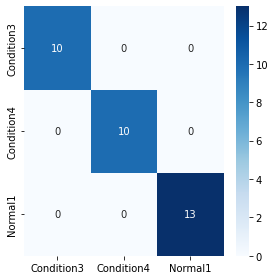

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Fold Group  3


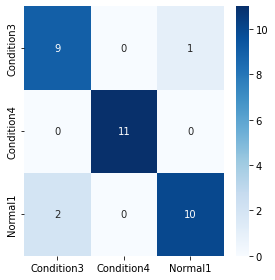

              precision    recall  f1-score   support

  Condition3       0.82      0.90      0.86        10
  Condition4       1.00      1.00      1.00        11
     Normal1       0.91      0.83      0.87        12

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



Fold Group  4


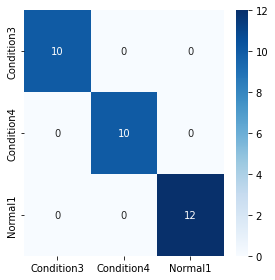

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


RF

max_samples =  0.51
average C3 Precision =  0.9233
average C4 Precision =  1.0
average N1 Precision =  0.9273
average Accuracy =  0.947


In [11]:
#test new optmization
model = RFC(random_state = 0, max_samples = 0.50, n_estimators = 100)
n = 1

C3PL = []
C4PL = []
N1PL = []

AL = []

for trainIndex, testIndex in cv.split(X, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3PL.append(C3Pre)
    C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4PL.append(C4Pre)
    N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1PL.append(N1Pre)
    
    Acc = acs(test_Y,pred_Y)
    AL.append(Acc)
    
print('\nRF\n')
print('max_samples = ',sbest)

print('average C3 Precision = ', np.mean(C3PL).round(4))
print('average C4 Precision = ' , np.mean(C4PL).round(4))
print('average N1 Precision = ', np.mean(N1PL).round(4))
print('average Accuracy = ', np.mean(AL).round(4))

In [12]:
#we wanted to see if test accuracy can be improved if both parameters were searched for concurrently 
Start = time.time()

#simultaneous search

nbase = 100
sbase = 1

baseDF = pd.DataFrame(columns = ['n','s'])

index = 0

for stage in range(2):
    
    nRange = []
    sRange = []
    
    for i in range(-10,11):
        if ( i != -10):
            x = np.round(nbase + i*(10**(1-stage)),stage)
            nRange.append(x)
        y = np.round(sbase + i*(10**(-1-stage)),stage+1)
        if (y < 1):
            sRange.append(y)

    sRange[0] = sRange[0] + 10**(-2-stage)
    sRange[-1] = sRange[-1] - 10**(-2-stage)
    
    param_grid = {'n_estimators': nRange, 'max_samples': sRange}
    grid = GridSearchCV(RFC(random_state = 0), param_grid, cv = cv, verbose = 1)
    grid.fit(X,Y.values.ravel())
    
    nbase = grid.best_params_['n_estimators']
    sbase = grid.best_params_['max_samples']
    
    baseDF.loc[index] = [nbase,sbase]
    
    index += 1

End = time.time()

print('\n',np.round(End-Start,1), 'seconds elapsed')

baseDF



Fitting 4 folds for each of 200 candidates, totalling 800 fits
Fitting 4 folds for each of 420 candidates, totalling 1680 fits

 282.8 seconds elapsed


,n,s
0,120.0,0.89
1,117.0,0.87


In [13]:
nbest, sbest = baseDF.iloc[-1]

nbest = np.int_(nbest)



Fold Group  1


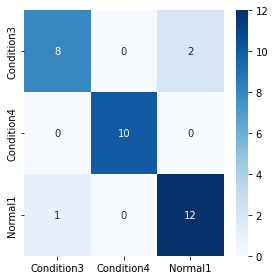

              precision    recall  f1-score   support

  Condition3       0.89      0.80      0.84        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.86      0.92      0.89        13

    accuracy                           0.91        33
   macro avg       0.92      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



Fold Group  2


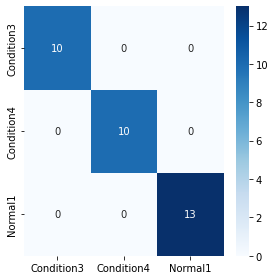

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       1.00      1.00      1.00        10
     Normal1       1.00      1.00      1.00        13

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Fold Group  3


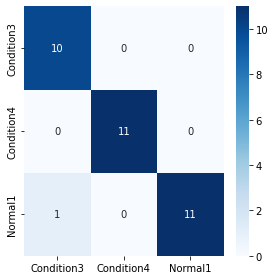

              precision    recall  f1-score   support

  Condition3       0.91      1.00      0.95        10
  Condition4       1.00      1.00      1.00        11
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  4


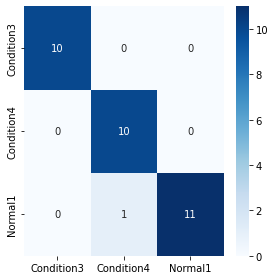

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        10
  Condition4       0.91      1.00      0.95        10
     Normal1       1.00      0.92      0.96        12

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32


Tuned RF

n_estimators =  117
max_samples =  0.87
average C3 Precision =  0.9495
average C4 Precision =  0.9773
average N1 Precision =  0.9643
average Accuracy =  0.9619


In [14]:
#we tested the optmised results in the simultaneous search
model = RFC(random_state = 0, n_estimators = nbest, max_samples =sbest)
n = 1

C3PL = []
C4PL = []
N1PL = []

AL = []

for trainIndex, testIndex in cv.split(X, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3PL.append(C3Pre)
    C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4PL.append(C4Pre)
    N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1PL.append(N1Pre)
    
    Acc = acs(test_Y,pred_Y)
    AL.append(Acc)
    
print('\nTuned RF\n')
print('n_estimators = ', nbest)
print('max_samples = ', sbest)

print('average C3 Precision = ', np.mean(C3PL).round(4))
print('average C4 Precision = ' , np.mean(C4PL).round(4))
print('average N1 Precision = ', np.mean(N1PL).round(4))
print('average Accuracy = ', np.mean(AL).round(4))



Fold Group  1


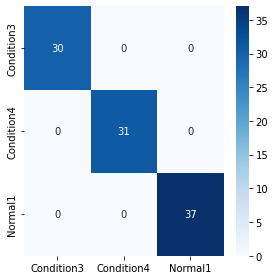

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      1.00      1.00        37

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



Fold Group  2


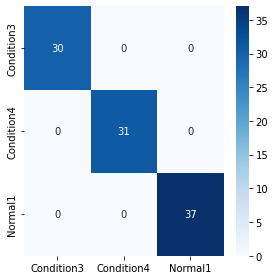

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      1.00      1.00        37

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



Fold Group  3


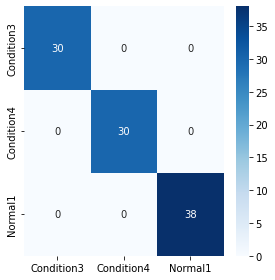

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        30
     Normal1       1.00      1.00      1.00        38

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



Fold Group  4


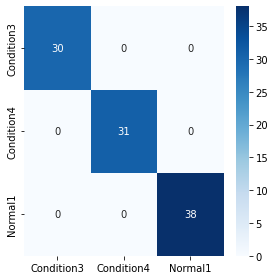

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      1.00      1.00        38

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99


RF

max_samples =  0.87
average C3 Precision =  1.0
average C4 Precision =  1.0
average N1 Precision =  1.0
average Accuracy =  1.0


In [15]:
#Found training accuracy to compare overfit
model = RFC(random_state = 0, n_estimators = nbest, max_samples = sbest)
n = 1

C3PL = []
C4PL = []
N1PL = []

AL = []

for trainIndex, testIndex in cv.split(X, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(train_X)
    
    CM = confusion_matrix(train_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(train_Y,pred_Y))
    
    C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3PL.append(C3Pre)
    C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4PL.append(C4Pre)
    N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1PL.append(N1Pre)
    
    Acc = acs(train_Y,pred_Y)
    AL.append(Acc)
    
print('\nRF\n')
print('max_samples = ',sbest)

print('average C3 Precision = ', np.mean(C3PL).round(4))
print('average C4 Precision = ' , np.mean(C4PL).round(4))
print('average N1 Precision = ', np.mean(N1PL).round(4))
print('average Accuracy = ', np.mean(AL).round(4))

In [16]:
#we wanted to see if we could optmise the RF further, hence we looked at the same hyperparameters used to optmise the DT

colNames = ['max depth','min leaf','C3P','C4P','N1P','Acc']
AccDF = pd.DataFrame(columns = colNames)
AccIndex = 0

for i in range(2, 5):                  #choose depth from 2 to 4 ( max tree depth - 1)
    depth = i
    print('\nmax_depth', i)
    
        
    for j in range(1,26):                                         #...choose leaf size from 1 to 25 next...
        
        N1PL = []    # Normal1 Precision List
        C3PL = []    # Condition3 Precision List
        C4PL = []    # Condition4 Precision List
        AL = []
        
        print('min_samples_leaf = ', j+1)
        
        model = RFC(random_state = 0, max_depth = depth, min_samples_leaf = j+1)

        for trainIndex, testIndex in cv.split(X,Y):
    
            train_X = X.iloc[trainIndex]                 #train/test data allocation
            test_X = X.iloc[testIndex]
            train_Y = Y.iloc[trainIndex]
            test_Y = Y.iloc[testIndex]
    
            model.fit(train_X,train_Y.values.ravel())                   #model building and prediction
            pred_Y = model.predict(test_X)
    
            CM = confusion_matrix(test_Y, pred_Y)        #confusion matrix
    
            C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
            C3PL.append(C3Pre)
            C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
            C4PL.append(C4Pre)
            N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
            N1PL.append(N1Pre)
    
            Acc = acs(test_Y,pred_Y)
            AL.append(Acc)
            
        # at the end of cross validation, calculate accuracy averages
        
        C3Pmean = np.mean(C3PL).round(4)
        C4Pmean = np.mean(C4PL).round(4)
        N1Pmean = np.mean(N1PL).round(4)
        Accmean = np.mean(AL).round(4)
        
        print('Accuracy =', Accmean)
        
        AccDF.loc[AccIndex] = [depth,j+1,C3Pmean,C4Pmean,N1Pmean,Accmean]#stores result in AccDF
        AccIndex = AccIndex + 1



max_depth 2
min_samples_leaf =  2
Accuracy = 0.9089
min_samples_leaf =  3
Accuracy = 0.9089
min_samples_leaf =  4
Accuracy = 0.9164
min_samples_leaf =  5
Accuracy = 0.9089
min_samples_leaf =  6
Accuracy = 0.9013
min_samples_leaf =  7
Accuracy = 0.9089
min_samples_leaf =  8
Accuracy = 0.9089
min_samples_leaf =  9
Accuracy = 0.9086
min_samples_leaf =  10
Accuracy = 0.8857
min_samples_leaf =  11
Accuracy = 0.8932
min_samples_leaf =  12
Accuracy = 0.8781
min_samples_leaf =  13
Accuracy = 0.8857
min_samples_leaf =  14
Accuracy = 0.8781
min_samples_leaf =  15
Accuracy = 0.8857
min_samples_leaf =  16
Accuracy = 0.8932
min_samples_leaf =  17
Accuracy = 0.8857
min_samples_leaf =  18
Accuracy = 0.8857
min_samples_leaf =  19
Accuracy = 0.8932
min_samples_leaf =  20
Accuracy = 0.8857
min_samples_leaf =  21
Accuracy = 0.8705
min_samples_leaf =  22
Accuracy = 0.8781
min_samples_leaf =  23
Accuracy = 0.8627
min_samples_leaf =  24
Accuracy = 0.84
min_samples_leaf =  25
Accuracy = 0.8248
min_samples_l

In [17]:
AccDF.sort_values(by = 'Acc', ascending = False)

,max depth,min leaf,C3P,C4P,N1P,Acc
50,4.0,2.0,0.9393,0.9564,0.9148,0.9316
51,4.0,3.0,0.9393,0.9564,0.9148,0.9316
52,4.0,4.0,0.9393,0.9773,0.8833,0.9240
2,2.0,4.0,0.9333,0.9564,0.8859,0.9164
26,3.0,3.0,0.9143,0.9564,0.8955,0.9164
...,...,...,...,...,...,...
47,3.0,24.0,0.8197,0.8410,0.8851,0.8400
72,4.0,24.0,0.8197,0.8410,0.8851,0.8400
23,2.0,25.0,0.7992,0.8279,0.8661,0.8248
48,3.0,25.0,0.7992,0.8279,0.8661,0.8248


In [ ]:
# we took the optimal max_depth and min leaf and amalgamated them against original optimised hyperparameters and ran it, hoping for an increased accuracy



Fold Group  1


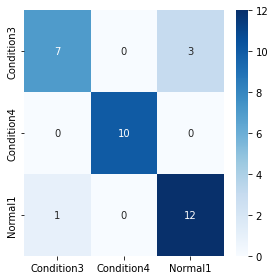

              precision    recall  f1-score   support

  Condition3       0.88      0.70      0.78        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.88        33
   macro avg       0.89      0.87      0.88        33
weighted avg       0.88      0.88      0.88        33



Fold Group  2


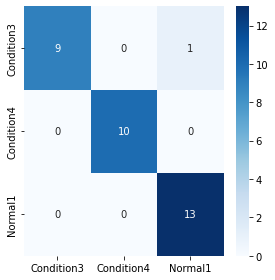

              precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.93      1.00      0.96        13

    accuracy                           0.97        33
   macro avg       0.98      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



Fold Group  3


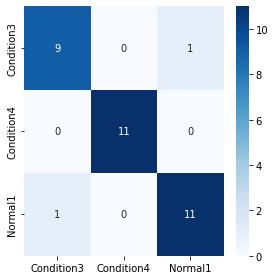

              precision    recall  f1-score   support

  Condition3       0.90      0.90      0.90        10
  Condition4       1.00      1.00      1.00        11
     Normal1       0.92      0.92      0.92        12

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



Fold Group  4


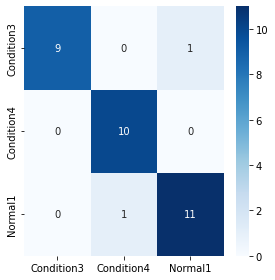

              precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       0.91      1.00      0.95        10
     Normal1       0.92      0.92      0.92        12

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32


RF

max_samples =  0.87
average C3 Precision =  0.9438
average C4 Precision =  0.9773
average N1 Precision =  0.8905
average Accuracy =  0.9313


In [32]:
model = model = RFC(random_state = 0, n_estimators = nbest, max_samples = sbest, max_depth = 4, min_samples_leaf = 3)
n = 1

C3PL = []
C4PL = []
N1PL = []

AL = []

for trainIndex, testIndex in cv.split(X, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(test_X)
    
    CM = confusion_matrix(test_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(test_Y,pred_Y))
    
    C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3PL.append(C3Pre)
    C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4PL.append(C4Pre)
    N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1PL.append(N1Pre)
    
    Acc = acs(test_Y,pred_Y)
    AL.append(Acc)
    
print('\nRF\n')
print('max_samples = ',sbest)

print('average C3 Precision = ', np.mean(C3PL).round(4))
print('average C4 Precision = ' , np.mean(C4PL).round(4))
print('average N1 Precision = ', np.mean(N1PL).round(4))
print('average Accuracy = ', np.mean(AL).round(4))

In [ ]:
#however we realised that it did not give as good accuracies as the initial simultaneous optmization of n_estimators and max_samples 



Fold Group  1


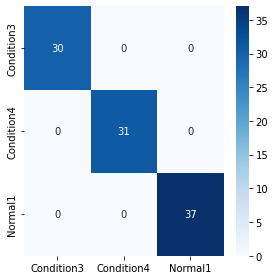

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      1.00      1.00        37

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



Fold Group  2


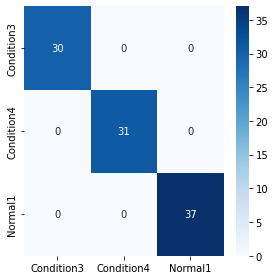

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      1.00      1.00        37

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



Fold Group  3


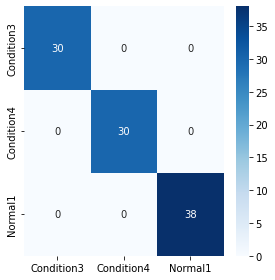

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        30
     Normal1       1.00      1.00      1.00        38

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



Fold Group  4


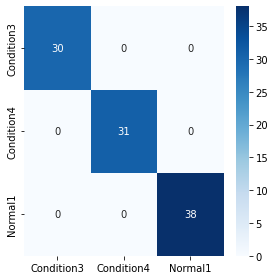

              precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      1.00      1.00        38

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99


RF

max_samples =  0.87
average C3 Precision =  1.0
average C4 Precision =  1.0
average N1 Precision =  1.0
average Accuracy =  1.0


In [19]:
#we procede to find training dataset for this optmization to compare overfit if needed
model = RFC(random_state = 0, max_depth = 4, min_samples_leaf = 3)
n = 1

C3PL = []
C4PL = []
N1PL = []

AL = []

for trainIndex, testIndex in cv.split(X, Y):
    print('\n\nFold Group ', n)
    n += 1
    
    train_X = X.iloc[trainIndex]
    test_X = X.iloc[testIndex]
    train_Y = Y.iloc[trainIndex]
    test_Y = Y.iloc[testIndex]
    
    model.fit(train_X, train_Y.values.ravel())
    pred_Y = model.predict(train_X)
    
    CM = confusion_matrix(train_Y, pred_Y)
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)

    print(classification_report(train_Y,pred_Y))
    
    C3Pre = CM[0,0] / (CM[0,0] + CM[1,0] + CM[2,0])
    C3PL.append(C3Pre)
    C4Pre = CM[1,1] / (CM[0,1] + CM[1,1] + CM[2,1])
    C4PL.append(C4Pre)
    N1Pre = CM[2,2] / (CM[0,2] + CM[1,2] + CM[2,2])
    N1PL.append(N1Pre)
    
    Acc = acs(train_Y,pred_Y)
    AL.append(Acc)
    
print('\nRF\n')
print('max_samples = ',sbest)

print('average C3 Precision = ', np.mean(C3PL).round(4))
print('average C4 Precision = ' , np.mean(C4PL).round(4))
print('average N1 Precision = ', np.mean(N1PL).round(4))
print('average Accuracy = ', np.mean(AL).round(4))

In [ ]:
#we proceded to test out Adaboost, an ensemble method


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.88
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       0.88      0.70      0.78        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.80      0.92      0.86        13

    accuracy                           0.88        33
   macro avg       0.89      0.87      0.88        33
weighted avg       0.88      0.88      0.88        33



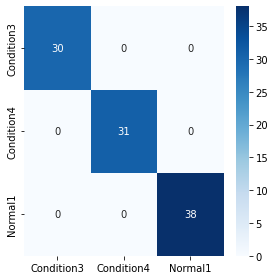


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.67
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       0.00      0.00      0.00        10
  Condition4       1.00      0.90      0.95        10
     Normal1       0.54      1.00      0.70        13

    accuracy                           0.67        33
   macro avg       0.51      0.63      0.55        33
weighted avg       0.52      0.67      0.56        33



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


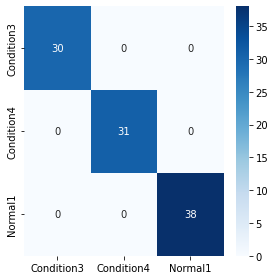


 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.88
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       0.71      1.00      0.83        10
  Condition4       1.00      1.00      1.00        11
     Normal1       1.00      0.67      0.80        12

    accuracy                           0.88        33
   macro avg       0.90      0.89      0.88        33
weighted avg       0.91      0.88      0.88        33



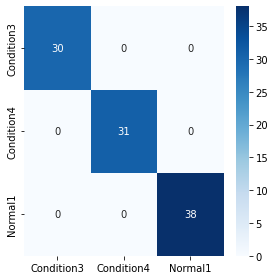


 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       0.91      1.00      0.95        10
     Normal1       0.92      0.92      0.92        12

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



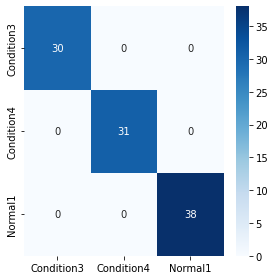

In [20]:
#oringinal default adaboost
adaboost = AdaBoostClassifier(n_estimators =100, learning_rate=1.0, random_state=0)

#split data into 3/4 for training and 1/4] for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, Y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = Y.iloc[tr_i]
    y_v = Y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboost.fit(X_tr, y_tr.values.ravel())
    y_p = model.predict(X_v)
    
    #calculate accuracy
   
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    #use heatmap
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.98
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       0.97      1.00      0.98        30
  Condition4       0.97      1.00      0.98        31
     Normal1       1.00      0.95      0.97        37

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



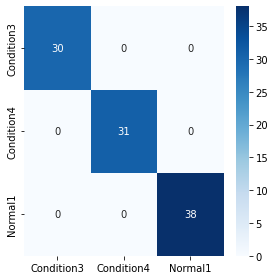


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.69
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       0.00      0.00      0.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       0.55      1.00      0.71        37

    accuracy                           0.69        98
   macro avg       0.52      0.67      0.57        98
weighted avg       0.52      0.69      0.58        98



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


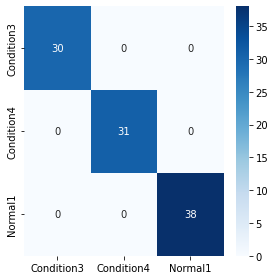


 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.95
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       0.86      1.00      0.92        30
  Condition4       1.00      1.00      1.00        30
     Normal1       1.00      0.87      0.93        38

    accuracy                           0.95        98
   macro avg       0.95      0.96      0.95        98
weighted avg       0.96      0.95      0.95        98



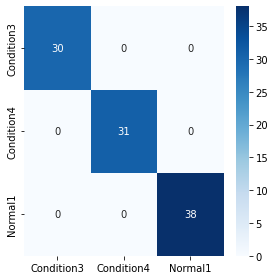


 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 1.0
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      1.00      1.00        30
  Condition4       1.00      1.00      1.00        31
     Normal1       1.00      1.00      1.00        38

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



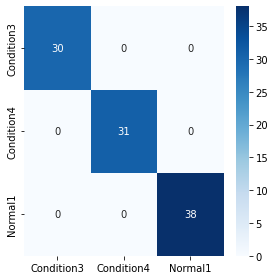

In [21]:
#oringinal default adaboost training data to compare overfit
adaboost = AdaBoostClassifier(n_estimators =100, learning_rate=1.0, random_state=0)

#split data into 3/4 for training and 1/4] for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, Y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = Y.iloc[tr_i]
    y_v = Y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboost.fit(X_tr, y_tr.values.ravel())
    y_p = model.predict(X_tr)
    
    #calculate accuracy
   
    accuracy = np.mean(acs(y_tr, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_tr,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    #use heatmap
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_tr, y_tr], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)

In [22]:
#adaboost optimisation via girdsearch
import numpy as np
import pandas as pd

# example of grid searching key hyperparameters for adaboost on a classification dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier as ADA

# import training data and define dataset

# define the model with default hyperparameters
model = ADA()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X, Y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.916193 using {'learning_rate': 0.1, 'n_estimators': 50}
0.671638 (0.015231) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.671638 (0.015231) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.671638 (0.015231) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.802320 (0.121543) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.671638 (0.015231) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.802320 (0.121543) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.802320 (0.121543) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.817472 (0.076427) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.802320 (0.121543) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.817472 (0.076427) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.802320 (0.088802) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.893466 (0.081333) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.893466 (0.078460) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.916193 

C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.ensemble import AdaBoostClassifier as ADA


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.82
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.40      0.57        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.68      1.00      0.81        13

    accuracy                           0.82        33
   macro avg       0.89      0.80      0.79        33
weighted avg       0.88      0.82      0.80        33



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


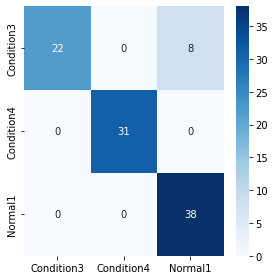


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.80      0.89        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.87      1.00      0.93        13

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


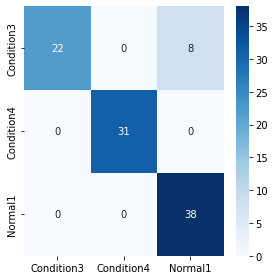


 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.97
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       1.00      1.00      1.00        11
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


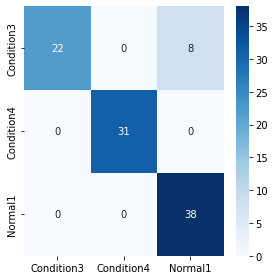


 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       0.91      1.00      0.95        10
     Normal1       0.92      0.92      0.92        12

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


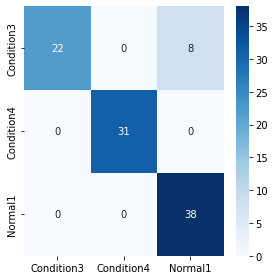

In [25]:
#optmised adaboost
adaboost = AdaBoostClassifier(n_estimators =50, learning_rate=0.1, random_state=0)

#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, Y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = Y.iloc[tr_i]
    y_v = Y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboost.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    #use heatmap
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)
    


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.82
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.40      0.57        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.68      1.00      0.81        13

    accuracy                           0.82        33
   macro avg       0.89      0.80      0.79        33
weighted avg       0.88      0.82      0.80        33



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


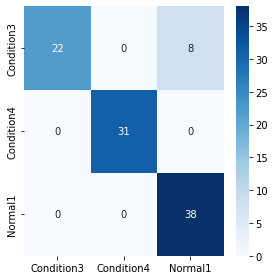


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.80      0.89        10
  Condition4       1.00      1.00      1.00        10
     Normal1       0.87      1.00      0.93        13

    accuracy                           0.94        33
   macro avg       0.96      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


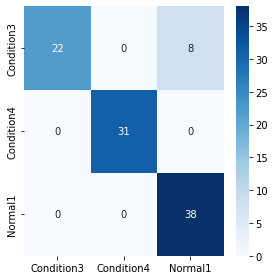


 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.97
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       1.00      1.00      1.00        11
     Normal1       0.92      1.00      0.96        12

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


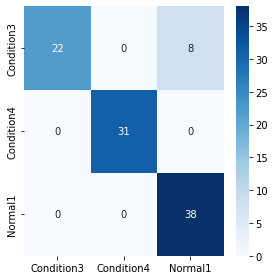


 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.94
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.90      0.95        10
  Condition4       0.91      1.00      0.95        10
     Normal1       0.92      0.92      0.92        12

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


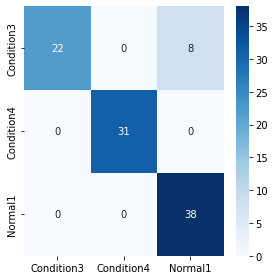

In [26]:
#optmised adaboost, print training data
adaboost = AdaBoostClassifier(n_estimators =50, learning_rate=0.1, random_state=0)

#split data into 3/4 for training and 1/4 for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, Y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = Y.iloc[tr_i]
    y_v = Y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboost.fit(X_tr, y_tr)
    y_p = model.predict(X_v)
    
    #calculate accuracy
    accuracy = np.mean(acs(y_v, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_v,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    #use heatmap
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_v, y_v], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)


 iteration: 1
training data length: 98
verification data length: 33
Accuracy: 0.95
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.83      0.91        30
  Condition4       1.00      1.00      1.00        31
     Normal1       0.88      1.00      0.94        37

    accuracy                           0.95        98
   macro avg       0.96      0.94      0.95        98
weighted avg       0.96      0.95      0.95        98



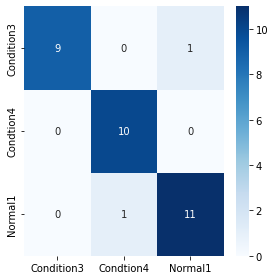


 iteration: 2
training data length: 98
verification data length: 33
Accuracy: 0.9
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.67      0.80        30
  Condition4       1.00      1.00      1.00        31
     Normal1       0.79      1.00      0.88        37

    accuracy                           0.90        98
   macro avg       0.93      0.89      0.89        98
weighted avg       0.92      0.90      0.89        98



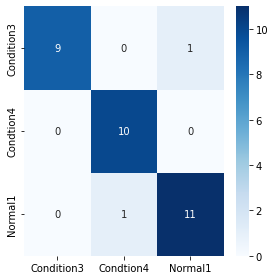


 iteration: 3
training data length: 98
verification data length: 33
Accuracy: 0.93
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.77      0.87        30
  Condition4       1.00      1.00      1.00        30
     Normal1       0.84      1.00      0.92        38

    accuracy                           0.93        98
   macro avg       0.95      0.92      0.93        98
weighted avg       0.94      0.93      0.93        98



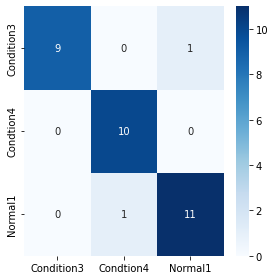


 iteration: 4
training data length: 99
verification data length: 32
Accuracy: 0.92
Adaboost Prediction report 
               precision    recall  f1-score   support

  Condition3       1.00      0.73      0.85        30
  Condition4       1.00      1.00      1.00        31
     Normal1       0.83      1.00      0.90        38

    accuracy                           0.92        99
   macro avg       0.94      0.91      0.92        99
weighted avg       0.93      0.92      0.92        99



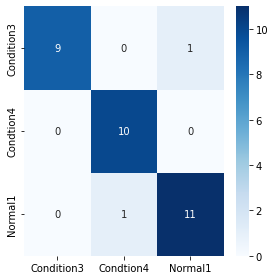

In [55]:
#optimised adaboost training data
adaboost = AdaBoostClassifier(n_estimators =50, learning_rate=0.1, random_state=0)

#split data into 3/4 for training and 1/4] for testing
cv = sk(n_splits=4, shuffle=True, random_state=0)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]
i=1
for tr_i, te_i in cv.split(X, Y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = Y.iloc[tr_i]
    y_v = Y.iloc[te_i]
    #print(X_v)
    #print(X_tr)
    print("\n iteration:", i)
    print("training data length:", len(y_tr))
    print("verification data length:", len(y_v))
    i= i+1
    # Fitting Random Forest Classification to the Training set
    model = adaboost.fit(X_tr, y_tr.values.ravel())
    y_p = model.predict(X_tr)
    
    #calculate accuracy
   
    accuracy = np.mean(acs(y_tr, y_p))
    print("Accuracy:", accuracy.round(2))
    accuracy_l.append(accuracy)
    
     ##  Confusion matrix and classification report
 
    print("Adaboost Prediction report", "\n", classification_report(y_tr,y_p))
    ### use confusion matrix to compare y_v and y_p, plot and save confusion matrix
    #use heatmap
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels = YClass , yticklabels = YClass)
    plt.tight_layout()
    plt.show(ax)
    
    #reset the label to original and save the original test data +prediction into a .csv file 
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True,inplace=True)
    #print(X_v)
    #print(y_v)
    #print(y_p)
    result_matrix = pd.concat([X_tr, y_tr], axis=1,ignore_index=True)
    result_matrix.loc[:,5] = y_p 
    #print("Result matrix")
    #print(result_matrix)